In [1]:
from magma import *

class FullAdder(Circuit):
    name = "FullAdder"
    IO = ["a", In(Bit), "b", In(Bit), "cin", In(Bit), "out", Out(Bit), "cout", Out(Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        _sum = io.a ^ io.b ^ io.cin
        wire(_sum, io.out)
        # Generate the carry
        carry = (io.a & io.b) | (io.b & io.cin) | (io.a & io.cin)
        wire(carry, io.cout)


In [2]:
from magma.backend.verilog import compile as compile_verilog

print(compile_verilog(FullAdder))

compiling FullAdder
module FullAdder (input  a, input  b, input  cin, output  out, output  cout);
wire  inst0_out;
wire  inst1_out;
wire  inst2_out;
wire  inst3_out;
wire  inst4_out;
wire  inst5_out;
wire  inst6_out;
coreir_bitxor inst0 (.in0(a), .in1(b), .out(inst0_out));
coreir_bitxor inst1 (.in0(inst0_out), .in1(cin), .out(inst1_out));
coreir_bitand inst2 (.in0(a), .in1(b), .out(inst2_out));
coreir_bitand inst3 (.in0(b), .in1(cin), .out(inst3_out));
coreir_bitor inst4 (.in0(inst2_out), .in1(inst3_out), .out(inst4_out));
coreir_bitand inst5 (.in0(a), .in1(cin), .out(inst5_out));
coreir_bitor inst6 (.in0(inst4_out), .in1(inst5_out), .out(inst6_out));
assign out = inst1_out;
assign cout = inst6_out;
endmodule




In [3]:
from magma.python_simulator import testvectors

full_adder_test_vectors = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

tests = testvectors(FullAdder)
print( "Success" if tests == full_adder_test_vectors else "Failure" )

Success


In [4]:
class FullAdder2(Circuit):
    name = "FullAdder2"
    IO = ["a", In(Bit), "b", In(Bit), "cin", In(Bit), "out", Out(Bit), "cout", Out(Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        sum_ = xor(xor(io.a, io.b), io.cin)
        wire(sum_, io.out)
        # Generate the carry
        ab = and_(io.a, io.b)
        bc = and_(io.b, io.cin)
        ca = and_(io.cin, io.a)
        carry = or_(or_(ab, bc), ca)
        wire(carry, io.cout)
        
print(compile_verilog(FullAdder))


compiling FullAdder
module FullAdder (input  a, input  b, input  cin, output  out, output  cout);
wire  inst0_out;
wire  inst1_out;
wire  inst2_out;
wire  inst3_out;
wire  inst4_out;
wire  inst5_out;
wire  inst6_out;
coreir_bitxor inst0 (.in0(a), .in1(b), .out(inst0_out));
coreir_bitxor inst1 (.in0(inst0_out), .in1(cin), .out(inst1_out));
coreir_bitand inst2 (.in0(a), .in1(b), .out(inst2_out));
coreir_bitand inst3 (.in0(b), .in1(cin), .out(inst3_out));
coreir_bitor inst4 (.in0(inst2_out), .in1(inst3_out), .out(inst4_out));
coreir_bitand inst5 (.in0(a), .in1(cin), .out(inst5_out));
coreir_bitor inst6 (.in0(inst4_out), .in1(inst5_out), .out(inst6_out));
assign out = inst1_out;
assign cout = inst6_out;
endmodule




In [5]:
tests = testvectors(FullAdder2)
print( "Success" if tests == full_adder_test_vectors else "Failure" )

Success


In [6]:
print(" a  b ci  o co")
for test in tests:
    for t in test:
        print("{:2d}".format(t), end=' ')
    print()

 a  b ci  o co
 0  0  0  0  0 
 0  0  1  1  0 
 0  1  0  1  0 
 0  1  1  0  1 
 1  0  0  1  0 
 1  0  1  0  1 
 1  1  0  0  1 
 1  1  1  1  1 


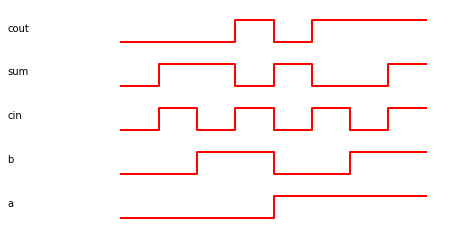

In [7]:
from magma.waveform import waveform

waveform(tests, ["a", "b", "cin", "sum", "cout"])